In [35]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
data = pd.read_csv('Satisfaction.csv')

In [37]:
data.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [38]:
data.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Normalization
## using minimax aloprithm

In [39]:
data1=data

In [40]:
data1["Age"]=((data1["Age"]-data1["Age"].min())/(data1["Age"].max()-data1["Age"].min()))*10
data1["Flight Distance"]=((data1["Flight Distance"]-data1["Flight Distance"].min())/(data1["Flight Distance"].max()-data1["Flight Distance"].min()))*10
data1["Seat comfort"]=((data1["Seat comfort"]-data1["Seat comfort"].min())/(data1["Seat comfort"].max()-data1["Seat comfort"].min()))*10
data1["Departure/Arrival time convenient"]=((data1["Departure/Arrival time convenient"]-data1["Departure/Arrival time convenient"].min())/(data1["Departure/Arrival time convenient"].max()-data1["Departure/Arrival time convenient"].min()))*10

In [41]:
data1.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,7.435897,Personal Travel,Eco,0.311549,0.0,0.0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,5.128205,Personal Travel,Business,3.498044,0.0,0.0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,1.025641,Personal Travel,Eco,3.025648,0.0,0.0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,6.794872,Personal Travel,Eco,0.830314,0.0,0.0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,8.076923,Personal Travel,Eco,0.440516,0.0,0.0,...,4,2,2,0,2,4,2,5,0,0.0


In [42]:
le = preprocessing.LabelEncoder()

In [43]:
data1['satisfaction_v2'] = le.fit_transform(data1['satisfaction_v2'])
data1['Gender'] = le.fit_transform(data1['Gender'])
data1['Customer Type'] = le.fit_transform(data1['Customer Type'])
data1['Type of Travel'] = le.fit_transform(data1['Type of Travel'])
data1['Class'] = le.fit_transform(data1['Class'])

In [44]:
data1.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,7.435897,1,1,0.311549,0.0,0.0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,5.128205,1,0,3.498044,0.0,0.0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,0,1.025641,1,1,3.025648,0.0,0.0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,6.794872,1,1,0.830314,0.0,0.0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,8.076923,1,1,0.440516,0.0,0.0,...,4,2,2,0,2,4,2,5,0,0.0


## decision tree algorithm

In [45]:
features = data1.loc[:, 'Gender':'Departure/Arrival time convenient']
label = data1['satisfaction_v2']

In [46]:
features

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient
0,0,0,7.435897,1,1,0.311549,0.0,0.0
1,1,0,5.128205,1,0,3.498044,0.0,0.0
2,0,0,1.025641,1,1,3.025648,0.0,0.0
3,0,0,6.794872,1,1,0.830314,0.0,0.0
4,0,0,8.076923,1,1,0.440516,0.0,0.0
...,...,...,...,...,...,...,...,...
129875,0,1,2.820513,1,1,2.435879,10.0,10.0
129876,1,1,7.179487,1,0,2.951746,4.0,6.0
129877,1,1,7.948718,1,1,3.289378,6.0,0.0
129878,1,1,7.564103,1,1,3.477757,6.0,4.0


In [47]:
label

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction_v2, Length: 129880, dtype: int32

In [48]:

model=DecisionTreeClassifier()
res=model.fit(features,label)

predict=model.predict(features)
actual=np.asarray(label)

In [49]:
predict

array([1, 1, 1, ..., 0, 0, 0])

In [50]:
actual

array([1, 1, 1, ..., 0, 0, 0])

In [51]:
data1.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,0,7.435897,1,1,0.311549,0.0,0.0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,0,5.128205,1,0,3.498044,0.0,0.0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,0,1.025641,1,1,3.025648,0.0,0.0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,0,6.794872,1,1,0.830314,0.0,0.0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,0,8.076923,1,1,0.440516,0.0,0.0,...,4,2,2,0,2,4,2,5,0,0.0


### accuracy

In [52]:
print('accuracy = ', metrics.accuracy_score(label,predict ))

accuracy =  0.9992916538343086


[Text(263.4304483367433, 215.65770491803278, 'Seat comfort <= 9.0\ngini = 0.496\nsamples = 129880\nvalue = [58793, 71087]\nclass = y[1]'),
 Text(194.05535616831412, 212.09311475409837, 'Class <= 0.5\ngini = 0.499\nsamples = 112053\nvalue = [58652, 53401]\nclass = y[0]'),
 Text(134.07835561464333, 208.52852459016393, 'Customer Type  <= 0.5\ngini = 0.449\nsamples = 52896\nvalue = [17970, 34926]\nclass = y[1]'),
 Text(110.71020692671135, 204.9639344262295, 'Departure/Arrival time convenient <= 9.0\ngini = 0.399\nsamples = 45130\nvalue = [12401, 32729]\nclass = y[1]'),
 Text(74.13026170596581, 201.39934426229507, 'Age <= 4.038\ngini = 0.359\nsamples = 41655\nvalue = [9748, 31907]\nclass = y[1]'),
 Text(26.3216442916903, 197.83475409836066, 'Age <= 1.474\ngini = 0.443\nsamples = 13246\nvalue = [4390, 8856]\nclass = y[1]'),
 Text(4.43663704013229, 194.27016393442622, 'Gender <= 0.5\ngini = 0.499\nsamples = 1272\nvalue = [661, 611]\nclass = y[0]'),
 Text(2.658210438026791, 190.7055737704918, 

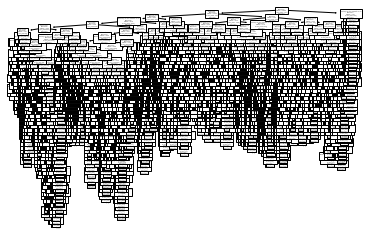

In [53]:
tree.plot_tree(model, feature_names=['Gender','Customer Type ','Age','Type of Travel ','Class','Flight Distance','Seat comfort','Departure/Arrival time convenient'], class_names=True)

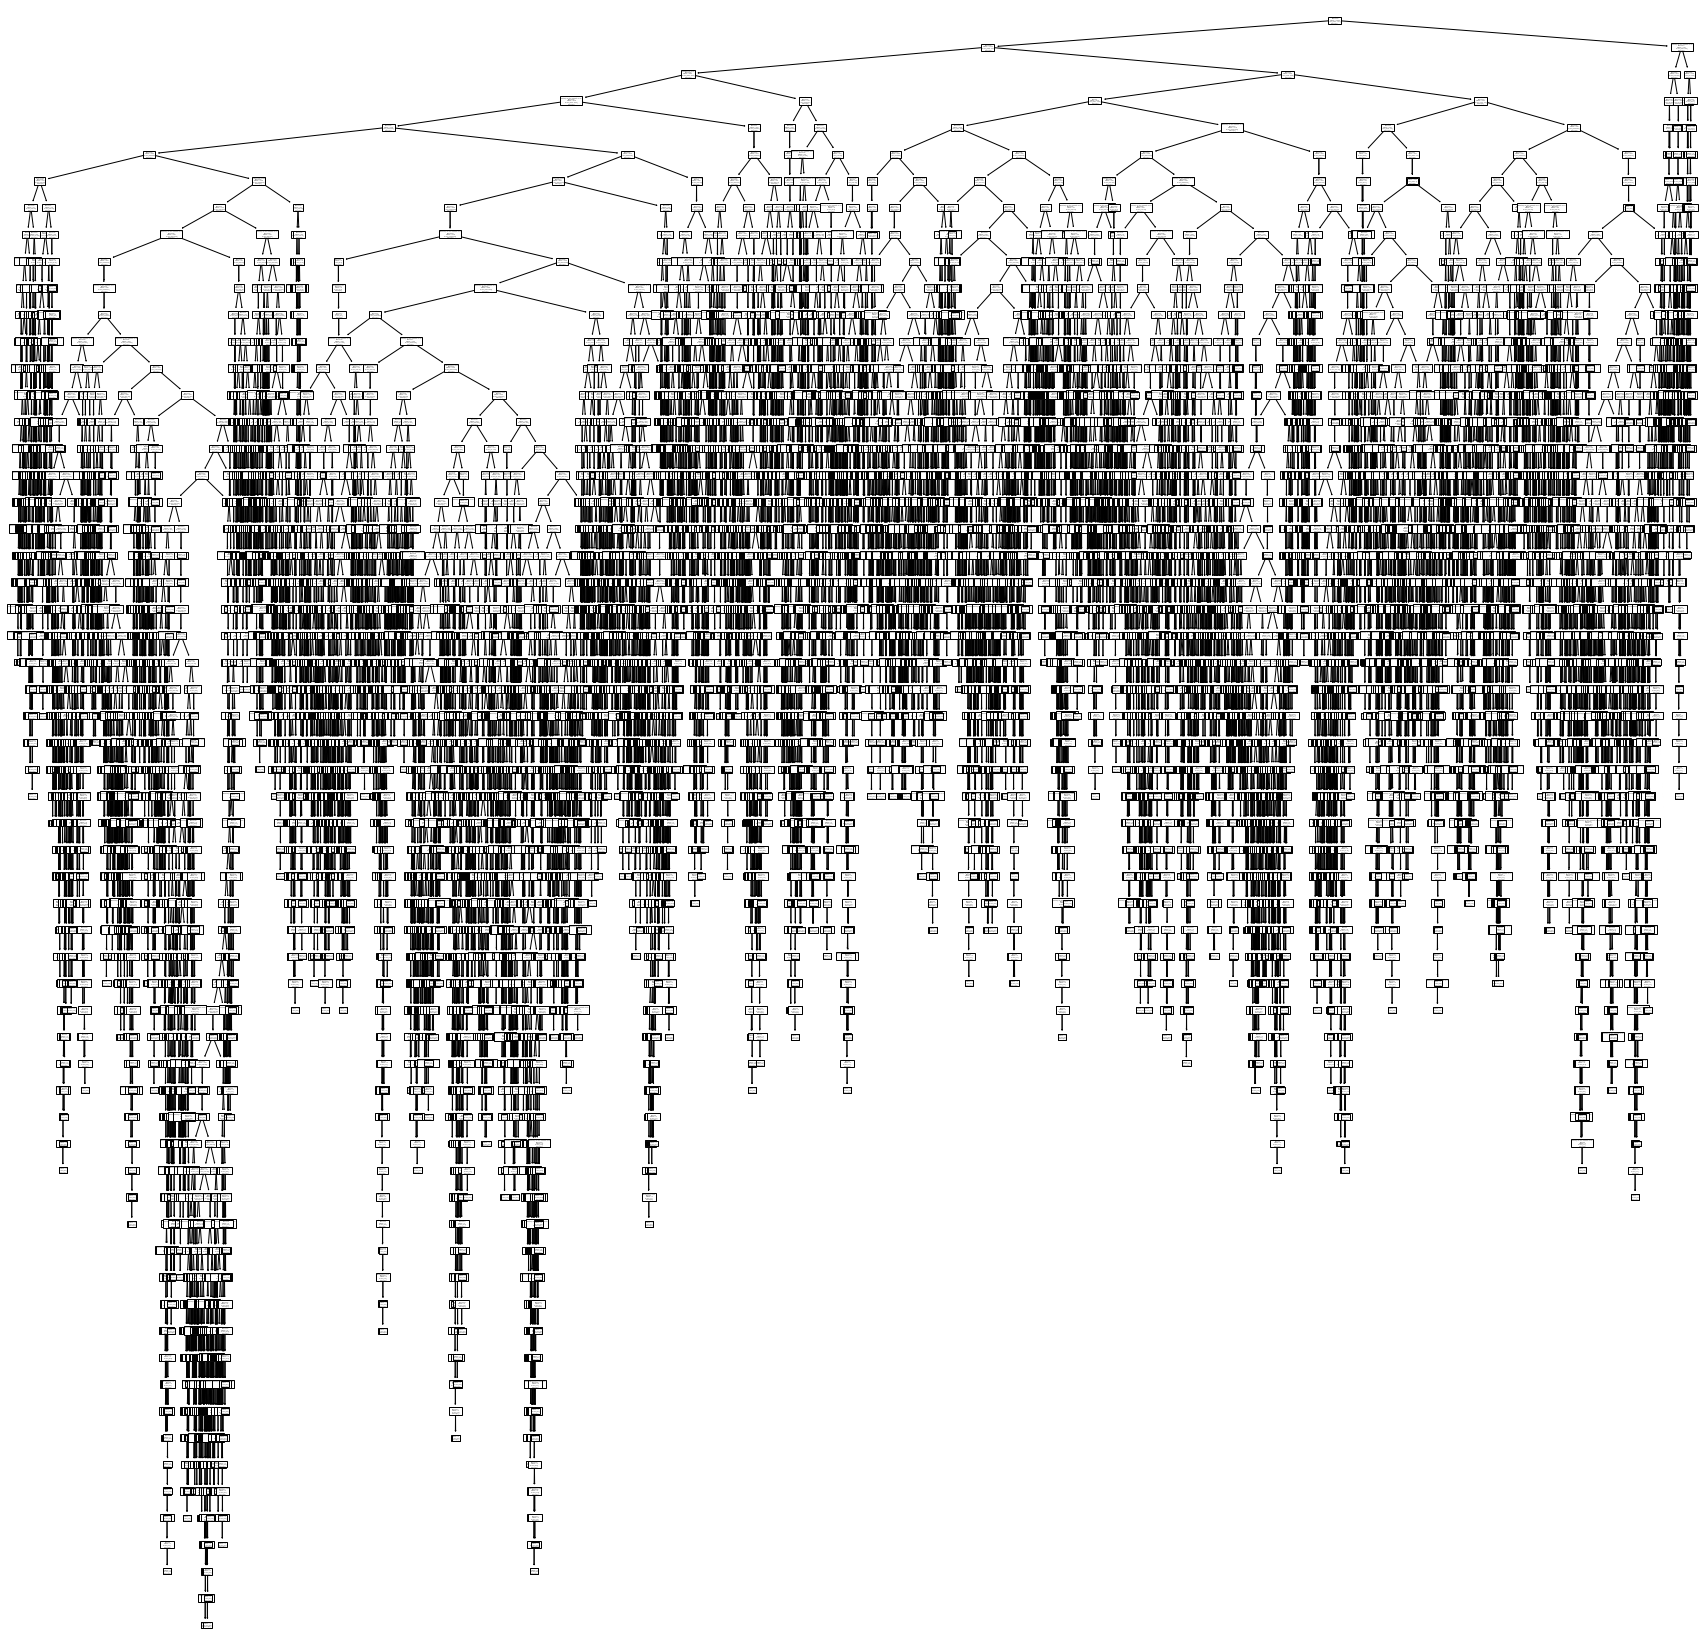

In [54]:
X, Y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
fig, ax = plt.subplots(figsize=(20, 13))
tree.plot_tree(model, feature_names=['Gender','Customer Type ','Age','Type of Travel ','Class','Flight Distance','Seat comfort','Departure/Arrival time convenient'], class_names=True)
plt.show()

### confusion matrix

In [55]:
matrix = confusion_matrix(actual,predict, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[70995    92]
 [    0 58793]]


In [56]:
tp, fn, fp, tn = confusion_matrix(actual,predict,labels=[1,0]).reshape(-1)
print('Outcome values : \n','TP: FN: FP: TN: \n', tp, fn, fp, tn)

Outcome values : 
 TP: FN: FP: TN: 
 70995 92 0 58793


In [57]:
matrix = classification_report(actual,predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     71087
           0       1.00      1.00      1.00     58793

    accuracy                           1.00    129880
   macro avg       1.00      1.00      1.00    129880
weighted avg       1.00      1.00      1.00    129880



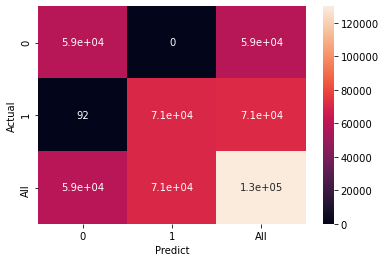

In [58]:
d_predict=predict
d_actual=actual
data2 = {'actual':    d_actual,
        'Predict': d_predict
        }
df = pd.DataFrame(data2, columns=['actual','Predict'])
confusion_matrix = pd.crosstab(df['actual'], df['Predict'], rownames=['Actual'], colnames=['Predict'], margins = True)

sn.heatmap(confusion_matrix, annot=True)
plt.show()